Distributed Denial of Service (DDoS) attacks are significant threats to the stability and reliability of online services. Detecting and mitigating these attacks is crucial to maintaining the integrity of networks and services. This project focuses on classifying DDoS attacks using various machine learning models. The dataset used for this project is the IDS 2017 dataset, which is publicly available and provides a comprehensive set of features for detecting DDoS attacks.

In [2]:
#Importing Libraries 
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [4]:
df=pd.read_csv("Data/DDos.csv")

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [7]:
unique_columns = df.columns
print (unique_columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [8]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [9]:
#Unique values in the Label target 

df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

In [10]:
# Remove rows where 'Label' column has NaN values
df_cleaned = df.dropna(subset=['Label'])

In [11]:
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

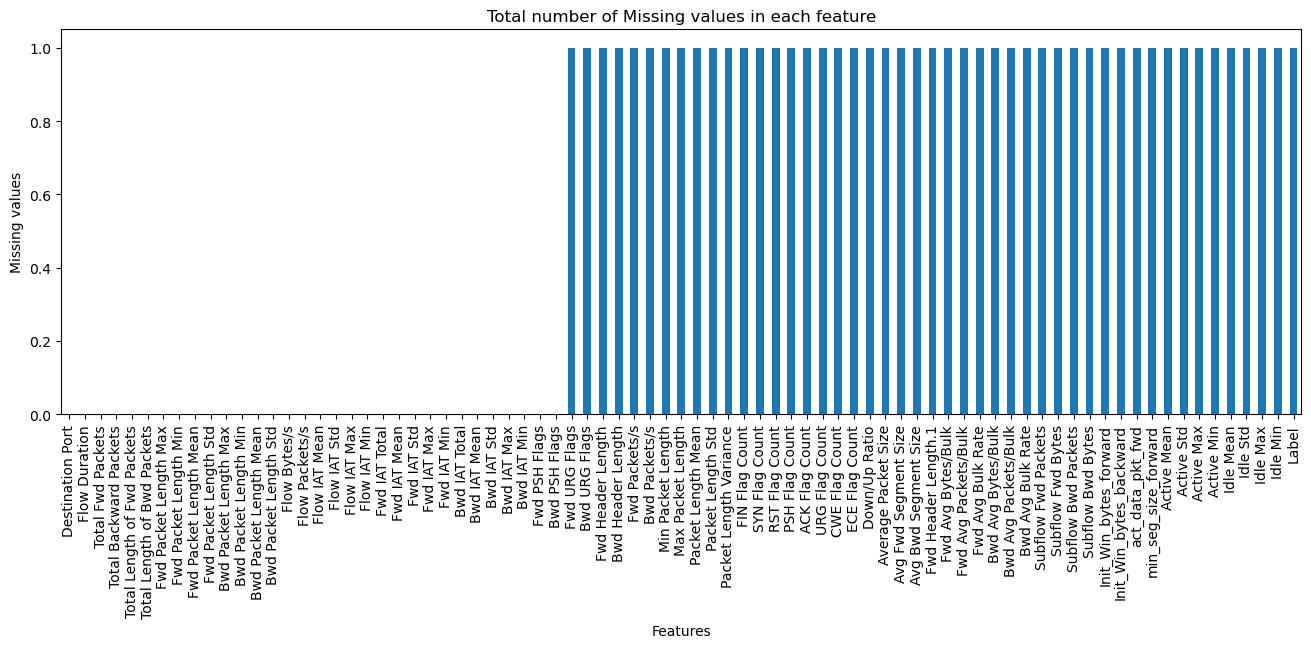

In [12]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [13]:
# Removing the null values
data=df.dropna()

In [17]:
#check if there are any NaN values 
null_values=data.isnull().sum()
print(null_values)

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64


In [18]:
# know the data types of the columns
(data.dtypes=='object')
# Convert the labels in the DataFrame to numerical values
data['Label'] = data['Label'].map({'BENIGN': 0, 'DDoS': 1})

/tmp/ipykernel_258/2376397139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Label'].map({'BENIGN': 0, 'DDoS': 1})


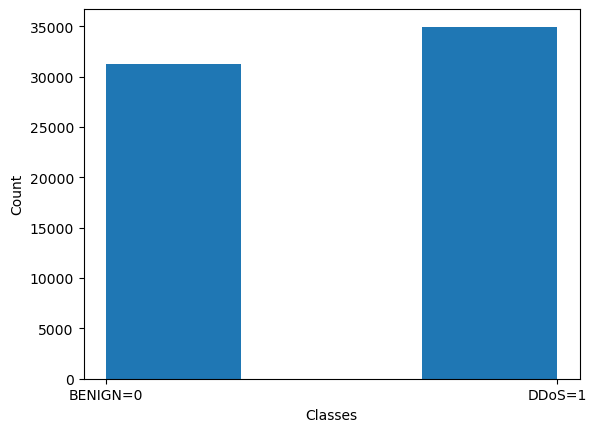

In [20]:
#CHECKING IF THERE IS ANY IMBALANCE BETWEEN VALUES OF THE TARGET LABEL 
plt.hist(data['Label'], bins=[0, 0.3,0.7,1])  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [21]:
# Split data into features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=55, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

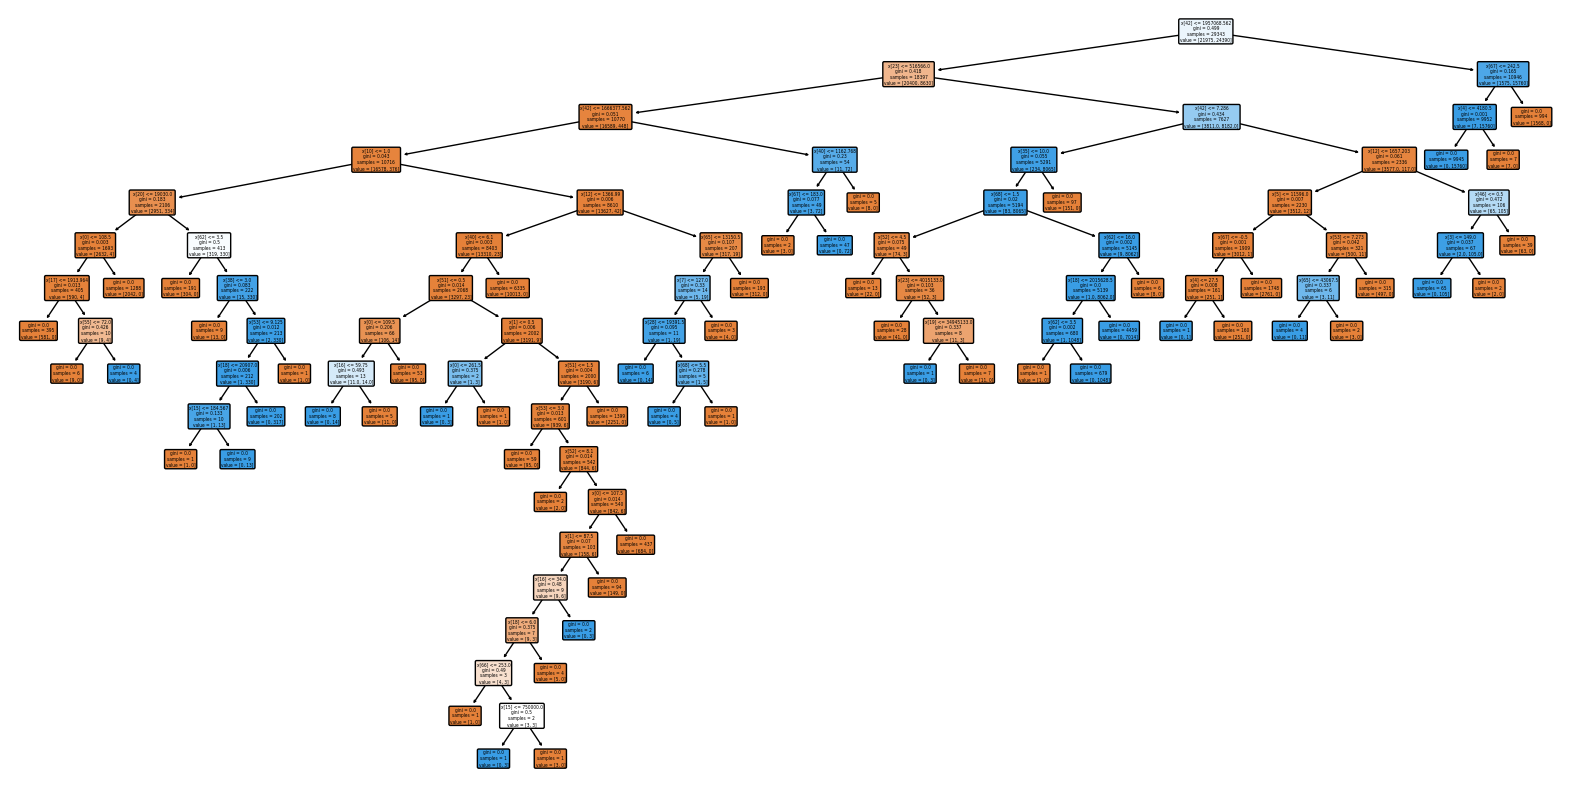

In [23]:
#Plotting the random forest tree
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [24]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9990


In [25]:
#Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9475
F1 Score: 0.9523
Precision: 0.9138
Recall: 0.9941


In [44]:
#Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingClassifier

GBM_model = GradientBoostingClassifier()
GBM_model.fit(X_train, y_train)
pred = GBM_model.predict(X_test)

In [45]:
GBM_accuracy = accuracy_score(y_test, pred)
GBM_f1 = f1_score(y_test, pred)
GBM_precision = precision_score(y_test, pred)
GBM_recall = recall_score(y_test, pred)
print('\nGradient Boosting Machines Metrics:')
print(f'Accuracy: {GBM_accuracy:.4f}')
print(f'F1 Score: {GBM_f1:.4f}')
print(f'Precision: {GBM_precision:.4f}')
print(f'Recall: {GBM_recall:.4f}')


Gradient Boosting Machines Metrics:
Accuracy: 0.9995
F1 Score: 0.9996
Precision: 1.0000
Recall: 0.9991


In [46]:
#Support Vector Machines (SVM)
from sklearn.svm import SVC

SVM_model = SVC()
SVM_model.fit(X_train, y_train)
SVM_pred = SVM_model.predict(X_test)

In [47]:
SVM_accuracy = accuracy_score(y_test, SVM_pred)
SVM_f1 = f1_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred)
SVM_recall = recall_score(y_test, SVM_pred)

print('\nSupport Vector Machine Metrics:')
print(f'Accuracy: {SVM_accuracy:.4f}')
print(f'F1 Score: {SVM_f1:.4f}')
print(f'Precision: {SVM_precision:.4f}')
print(f'Recall: {SVM_recall:.4f}')


Support Vector Machine Metrics:
Accuracy: 0.9517
F1 Score: 0.9540
Precision: 0.9568
Recall: 0.9513


In [48]:
#XGBoost
import xgboost as xgb

XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)
XGB_pred = XGB_model.predict(X_test)

In [49]:
# Calculate metrics
XGB_accuracy = accuracy_score(y_test, XGB_pred)
XGB_f1 = f1_score(y_test, XGB_pred)
XGB_precision = precision_score(y_test, XGB_pred)
XGB_recall = recall_score(y_test, XGB_pred)

# Print the metrics
print('\nXGBoost Metrics:')
print(f'Accuracy: {XGB_accuracy:.4f}')
print(f'F1 Score: {XGB_f1:.4f}')
print(f'Precision: {XGB_precision:.4f}')
print(f'Recall: {XGB_recall:.4f}')


XGBoost Metrics:
Accuracy: 0.9997
F1 Score: 0.9998
Precision: 1.0000
Recall: 0.9995


In [42]:
#Neural Network 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


scaler = StandardScaler()

#  MLPClassifier with a range of hyperparameters
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (20,), (50,), (100,), (50, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__max_iter': [10, 20]
}

#  a pipeline with scaling and the MLP model
pipeline = Pipeline([
    ('scaler', scaler),
    ('mlp', MLPClassifier(random_state=42))
])

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Find out the best model and predictions
best_nn_model = grid_search.best_estimator_
nn_pred = best_nn_model.predict(X_test)

# Print the best parameters and the best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-validation Score: {grid_search.best_score_:.4f}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converge

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converge

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.8s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   6.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   6.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   6.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.5s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.8s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.3s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.4s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.5s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.4s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.1s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.1s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.2s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.2s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   6.0s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   6.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   6.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   6.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.5s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.0s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.1s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.7s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.3s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.4s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.1s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.9s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   6.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.8s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.2s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   6.1s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   4.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converge

[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converge

[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converge

[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converge

[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converge

[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converge

[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=adam; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=adam; total time=   3.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converge

[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=adam; total time=   1.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=10, mlp__solver=sgd; total time=   1.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converge

[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=adam; total time=   3.4s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=adam; total time=   2.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.0s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=adam; total time=   4.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), mlp__max_iter=20, mlp__solver=sgd; total time=   3.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=adam; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=10, mlp__solver=sgd; total time=   2.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.6s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.6s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=adam; total time=   5.4s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.1s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(100,), mlp__max_iter=20, mlp__solver=sgd; total time=   5.2s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   2.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=adam; total time=   2.9s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=10, mlp__solver=sgd; total time=   2.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.8s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.9s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=adam; total time=   5.7s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.5s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.2s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   5.3s


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   3.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.01, mlp__hidden_layer_sizes=(50, 50), mlp__max_iter=20, mlp__solver=sgd; total time=   3.7s
Best Parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__max_iter': 20, 'mlp__solver': 'adam'}
Best Cross-validation Score: 0.9992


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9994
F1 Score: 0.9994
Precision: 0.9996
Recall: 0.9992


Model Comaprison 

In [51]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)

#GBM
GBM_proba = GBM_model.predict_proba(X_test)

#SVM
# SVM with probability=True
SVM_model = SVC(probability=True)
SVM_model.fit(X_train, y_train)
SVM_proba = SVM_model.predict_proba(X_test)

#XGB
XGB_proba = XGB_model.predict_proba(X_test)

# Neural Network
nn_proba = best_nn_model.predict_proba(X_test)

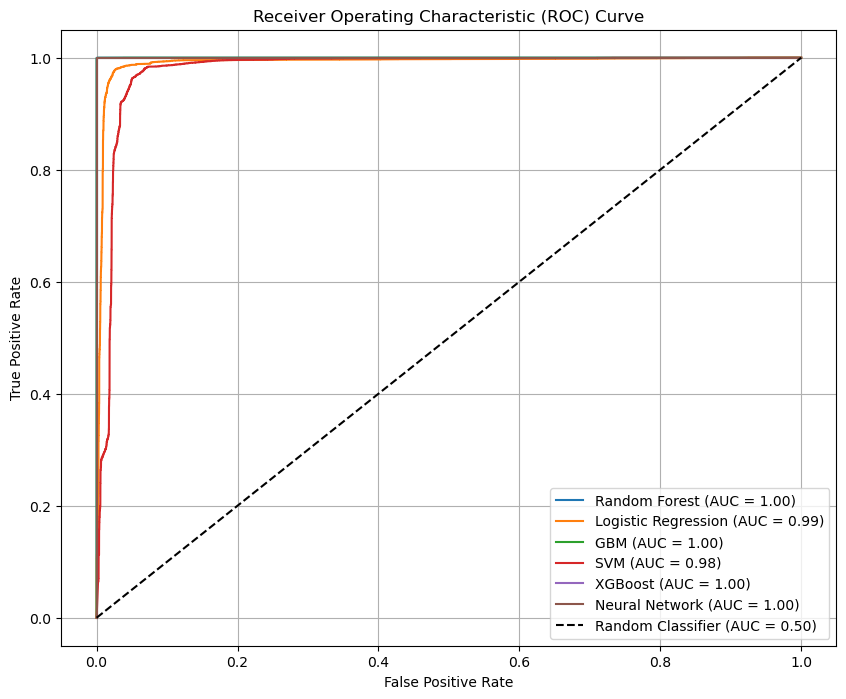

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC Curves and AUCs
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

GBM_fpr, GBM_tpr, _ = roc_curve(y_test, GBM_proba[:, 1])
GBM_auc = auc(GBM_fpr, GBM_tpr)

SVM_fpr, SVM_tpr, _ = roc_curve(y_test, SVM_proba[:, 1])
SVM_auc = auc(SVM_fpr, SVM_tpr)

XGB_fpr, XGB_tpr, _ = roc_curve(y_test, XGB_proba[:, 1])
XGB_auc = auc(XGB_fpr, XGB_tpr)

nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(GBM_fpr, GBM_tpr, label=f'GBM (AUC = {GBM_auc:.2f})')
plt.plot(SVM_fpr, SVM_tpr, label=f'SVM (AUC = {SVM_auc:.2f})')
plt.plot(XGB_fpr, XGB_tpr, label=f'XGBoost (AUC = {XGB_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)


plt.show()
